In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [2]:
df = pd.read_csv("C://Users//Sudipta//Downloads//housesalesprediction//kc_house_data.csv",parse_dates= ['date'])
print("Data shape: ", df.shape)
df.head()

Data shape:  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.drop('id',axis=1,inplace=True)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(
    df.drop(labels=['price','date'],axis = 1),
    df['price'],
    test_size=.3,
    random_state=0)

## Filter Menthod using Univariate f_regreesion Avona (if fetures are normally distributed)

In [20]:
from sklearn.feature_selection import f_regression,SelectKBest

In [22]:
univariate = f_regression(X_train.fillna(0),y_train)

In [23]:
univariate

(array([  1.65096989e+03,   5.70413005e+03,   1.47998142e+04,
          1.36891515e+02,   1.07352752e+03,   1.29364330e+03,
          3.06524248e+03,   2.86901951e+01,   1.21371706e+04,
          8.72012798e+03,   1.85458157e+03,   4.13909969e+01,
          2.37863653e+02,   3.15062011e+01,   1.56318647e+03,
          6.94826462e+00,   7.94259002e+03,   1.05881908e+02]),
 array([  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          1.74046242e-031,   1.54025386e-227,   6.61201682e-272,
          0.00000000e+000,   8.61749650e-008,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   1.28376143e-010,
          2.92281671e-053,   2.02295744e-008,   0.00000000e+000,
          8.39862148e-003,   0.00000000e+000,   9.44401694e-025]))

In [25]:
uni = pd.Series(univariate[1])
uni.index = X_train.columns
uni.sort_values(ascending = False)

long              8.398621e-03
condition         8.617496e-08
zipcode           2.022957e-08
yr_built          1.283761e-10
sqft_lot15        9.444017e-25
sqft_lot          1.740462e-31
yr_renovated      2.922817e-53
floors           1.540254e-227
waterfront       6.612017e-272
bathrooms         0.000000e+00
sqft_living       0.000000e+00
grade             0.000000e+00
view              0.000000e+00
sqft_living15     0.000000e+00
sqft_above        0.000000e+00
sqft_basement     0.000000e+00
lat               0.000000e+00
bedrooms          0.000000e+00
dtype: float64

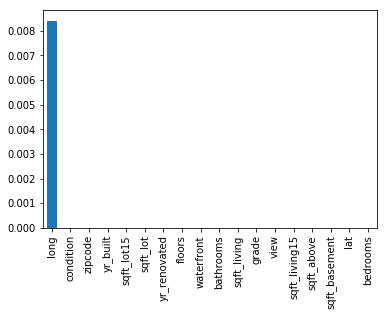

In [26]:
uni.sort_values(ascending = False).plot.bar()

In [28]:
sel_ = SelectPercentile(f_regression,percentile=90).fit(X_train.fillna(0),y_train)
X_train.columns[sel_.get_support()]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

## Using Univariate ROC_AUC

In [30]:
from sklearn.metrics import roc_auc_score,mean_squared_error

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [55]:
mse_values = []
for feature in X_train.columns:
    clf = DecisionTreeRegressor()
    clf.fit(X_train[feature].fillna(0).to_frame(),y_train)
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    mse_values.append(mean_squared_error(y_test,y_scored))
    

In [58]:
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending = False)

sqft_lot         2.082354e+11
sqft_lot15       1.761039e+11
condition        1.364756e+11
yr_renovated     1.350909e+11
yr_built         1.330481e+11
long             1.329030e+11
waterfront       1.300023e+11
lat              1.296266e+11
floors           1.268044e+11
sqft_basement    1.247076e+11
bedrooms         1.244743e+11
view             1.190692e+11
bathrooms        9.555114e+10
sqft_living15    9.347731e+10
sqft_above       9.154125e+10
zipcode          7.729242e+10
sqft_living      6.948919e+10
grade            6.478516e+10
dtype: float64

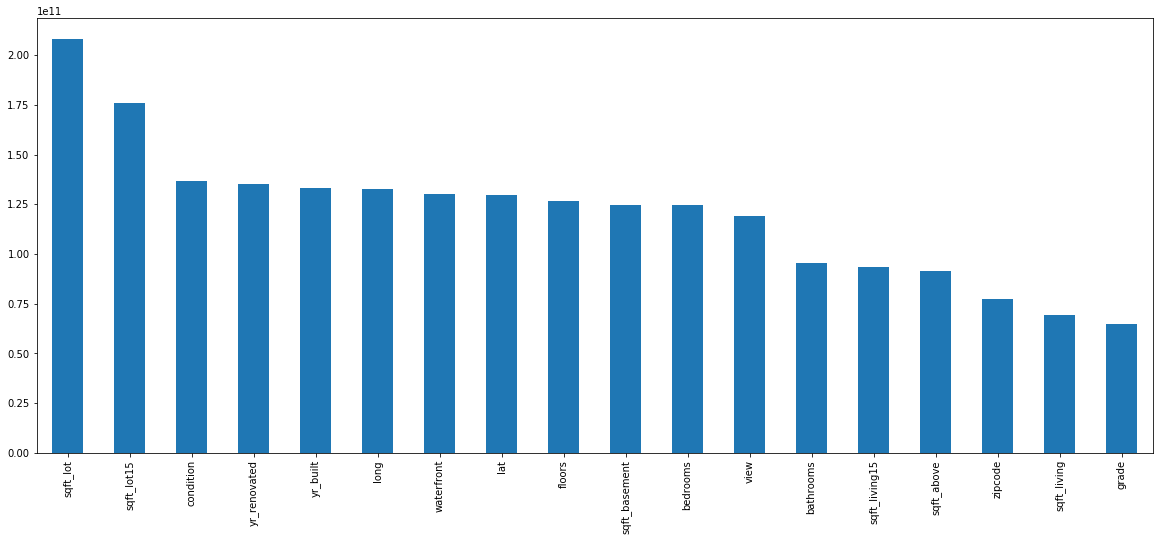

In [60]:
mse_values.sort_values(ascending = False).plot.bar(figsize=(20,8))


#### Wrapper method